## Analyse a Transmon qubit and one Resonator  using pyEPR
#### We use QISKIT METAL along with pyEPR 
#### EPR: Energy Participation Ratio: the ledger book of energy deposition that changes Hamiltonian

In [1]:
import pyEPR as epr
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import Dict, Headings, MetalGUI
from qiskit_metal.analyses.quantization import EPRanalysis
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

#### Start the GUI for the designing

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'
gui =MetalGUI(design)

#### Creating one Transmon

In [3]:
design.delete_all_components()
q1=TransmonPocket(design, 'Q1', 
                  options=dict(pad_width='425 um', pocket_height='650 um', 
                               connection_pads=dict(readout=dict(loc_w=+1, loc_H=+1, pad_width='200 um'))))
gui.rebuild()
gui.autoscale()

#### Creating one CPW resonator and connecting to the transmon 

otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='1.75mm',  pos_y='0um', orientation='0'))
RouteMeander(design, 'readout',  Dict(
        total_length='6 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))

gui.rebuild()
gui.autoscale()

#### Creating one analysis object dedicated to the readout

- Readout will beb analyzed in isolated condition
- Readout will be terminated with an "OPEN" on both the ends
- This analysis is being selected for both "readout" component and "open-to-ground"  component.

In [5]:
eig_qres = EPRanalysis(design, "hfss")

- Now let us analysis 2 eigenmodes for resonator: 
- - one with stronger field near transmon
  - other with stronger field near the resonator

In [7]:
eig_qres.sim.setup.n_modes=2
eig_qres.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

#### Analysis of both Qubit and Resonator 

In [8]:
eig_qres.sim.run(name="TransmonResonator", 
                 components=['Q1', 'readout', 'open_to_ground'],
                 open_terminations=[('readout', 'end')]
                )
eig_qres.sim.plot_convergences()

INFO 03:14PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:14PM [load_ansys_project]: 	Opened Ansys App
INFO 03:14PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 03:14PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/Abhijit Bhattacharyy/Documents/ANSYS_EM/
	Project:   Project1
INFO 03:14PM [connect_design]: No active design found (or error getting active design).
INFO 03:14PM [connect]: 	 Connected to project "Project1". No design detected
INFO 03:14PM [connect_design]: 	Opened active design
	Design:    TransmonResonator_hfss [Solution type: Eigenmode]
WARNING 03:14PM [connect_setup]: 	No design setup detected.
WARNING 03:14PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:14PM [analyze]: Analyzing setup Setup
03:16PM 20s INFO [get_f_convergence]: Saved conv

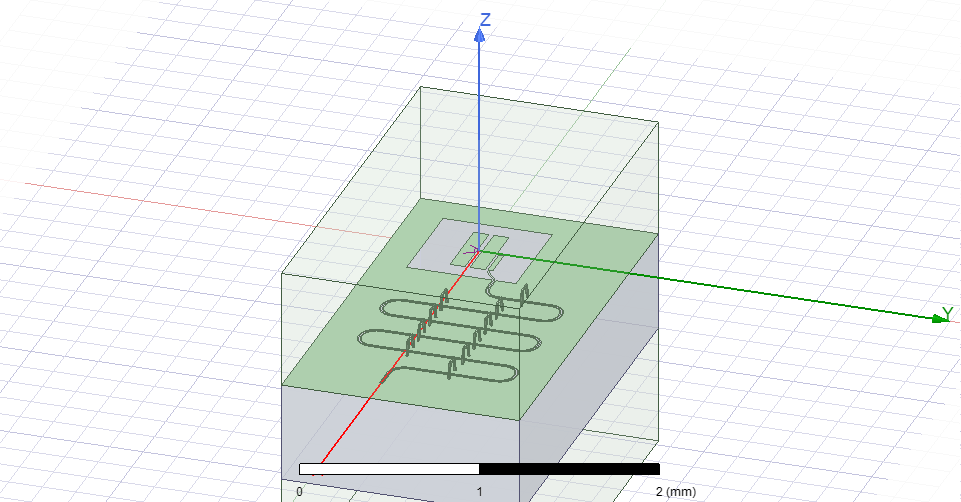

WindowsPath('D:/Qiskit_Metals/TIFR/School/1Q_1R/ansys.png')

In [9]:
eig_qres.sim.save_screenshot()

#### Plot E-Field on the chip surface  

INFO 03:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


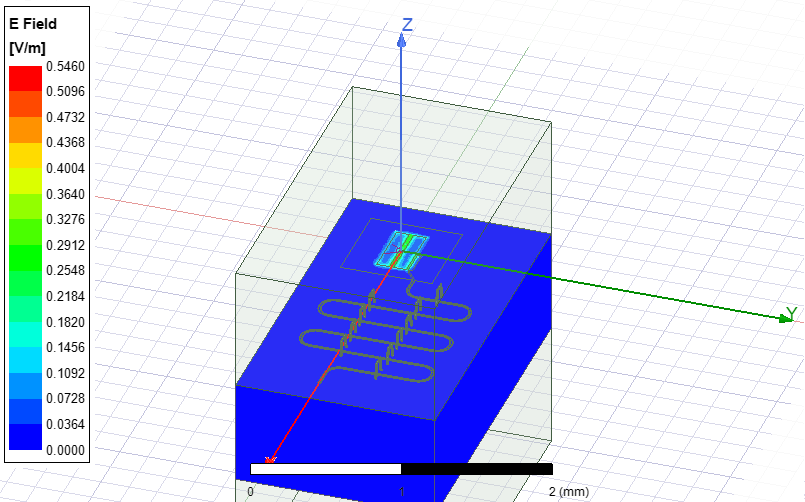

WindowsPath('D:/Qiskit_Metals/TIFR/School/1Q_1R/ansys.png')

In [10]:
eig_qres.sim.plot_fields('main', eigenmode=1) 
eig_qres.sim.save_screenshot() 

#### EPR Analysis 

In [13]:
eig_qres.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qres.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qres.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [14]:
eig_qres.run_epr()

Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 4.56571612200019e-24
        energy_elec_substrate = 4.19637062117818e-24
        EPR of substrate = 91.9%

        energy_mag    = 4.02282116127876e-26
        energy_mag % of energy_elec_all  = 0.9%
        

Variation 0  [1/1]

  Mode 0 at 6.22 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  2.283e-24 2.011e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.03%
	jj              0.990509  (+)        0.0302888
		(U_tot_cap-U_tot_ind)/mean=1.53%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.919104584921017

  Mode 1 at 9.24 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electri

WARNING 03:28PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\TransmonResonator_hfss\2024-02-05 15-27-30.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Finished the diagonalization
Pm_norm=
modes
0    1.031130
1    0.755373
dtype: float64

Pm_norm idx =
      jj
0   True
1  False
*** P (participation matrix, not normlz.)
         jj
0  0.961390
1  0.003148

*** S (sign-bit matrix)
   s_jj
0    -1
1     1
*** P (participation matrix, normalized.)
      0.99
    0.0031

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       291     2.74
      2.74  0.00647

*** Chi matrix ND (MHz) 
       324     2.32
      2.32  0.00467

*** Frequencies O1 PT (MHz)
0    5930.827942
1    9241.380001
dtype: float64

*** Frequencies ND (MHz)
0    5915.293518
1    9241.438983
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj       10
0   5915.29
1   9241.44

#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj                    
10 0  324.07  2.32e+00
   1    2.32  4.67e-03

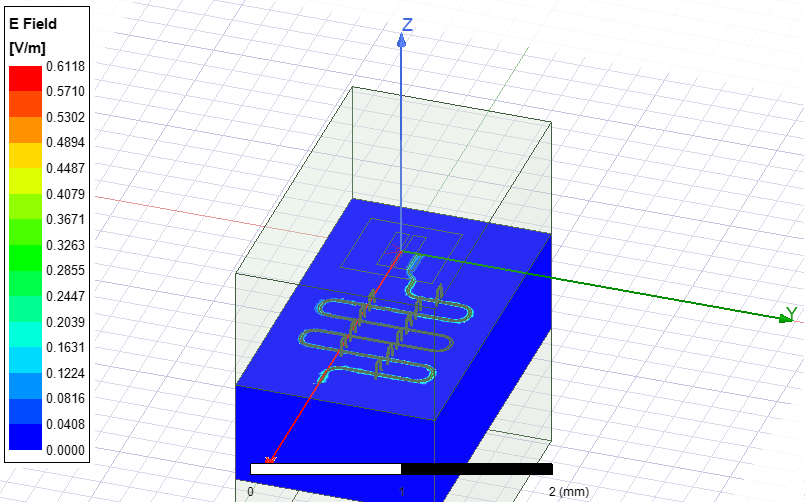

WindowsPath('D:/Qiskit_Metals/TIFR/School/1Q_1R/ansys.png')

In [15]:
eig_qres.sim.save_screenshot() 

In [16]:
gui.main_window.close()
eig_qres.sim.close()